# Clustering Overview
So far we've looked at regression and classification. These are both types of **'supervised machine learning'** in which you train an algorythm to predict an unkown variable from known variables. 

Another major type of machine learning is called **'unsupervised learning'** in which we arent trying to predict anything, but instead trying to find patterns in the data. So cool! 

One of the main unsupervised learning techniques is called clustering. We use clustering when tryting to explore a dataset, and understand connecitons between the various rows and columns. For example, we can cluster NBA players based on their statistics. 
Check out this article on how these clusters were created https://flowingdata.com/2012/03/21/redefining-nba-basketball-positions/

Clustering algorithims group similar rows together. There can be on or more groups in the data, and these groups form the clusters. As we look at the clusters, we can start to better understand the structure of the data. 
Clustering is a key way to explore unkown data, and its a very commonly used machine learning technique.

# Step 1: The Dataset
In this missions, we will explore US senator voting records. Read in the data and do some initial EDA!

114_congress.csv contains all of the results of roll call votes from the 114th Senate. Each row represents a single Senator, and each column represents a vote. A 0 in a cell means the Senator voted No on the bill, 1 means the Senator voted Yes, and 0.5 means the Senator abstained.

Here are the relevant columns:

- name -- The last name of the Senator.
- party -- the party of the Senator. The valid values are D for Democrat, R for Republican, and I for Independent.

Several columns numbered like 00001, 00004, etc. Each of these columns represents the results of a single roll call vote.

In [1]:
import pandas as pd
votes = pd.read_csv('114_congress.csv')
print(votes.head())
votes['party'].value_counts()
votes.mean()

        name party state    1    4    5    6    7    8    9   10   20   26  \
0  Alexander     R    TN  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1     Ayotte     R    NH  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0   
2    Baldwin     D    WI  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
3   Barrasso     R    WY  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
4     Bennet     D    CO  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   

    32   38   39   44   47  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  1.0  0.0  
2  1.0  1.0  0.0  1.0  1.0  
3  0.0  0.0  1.0  0.0  0.0  
4  0.0  1.0  0.0  1.0  0.0  


1     0.325
4     0.575
5     0.535
6     0.945
7     0.545
8     0.415
9     0.545
10    0.985
20    0.525
26    0.545
32    0.410
38    0.480
39    0.510
44    0.460
47    0.370
dtype: float64

# Step 2: Distance between Senators
To group senators together, we need some way to figure out how 'close' they are to each other. We can actually discover this distance mathematically, by finding how similar the votes of two senators are. The closer together the voting records of two senators are, the more ideologically similar they tend to be. To find the distance between two rows, we can use the **Euclidean distance**. https://en.wikipedia.org/wiki/Euclidean_distance

$$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$$

Use the euclidean_distances function from the sklearn.metrics.pairwise package. Its le dope. All you need to do is input the two series you are comparing in array format. It's necessary to only select columns after the first 3 because the first 3 are name, party, and state, which aren't numeric.

In [3]:
from sklearn.metrics.pairwise import euclidean_distances
#use the euclidean_distances funciton. 
distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1),votes.iloc[2,3:].values.reshape(1,-1))
print(distance)

[[ 3.31662479]]


# Step 3: Initial Clustering
We'll use an algorithm called k-means clustering to split our data into clusters. k-means clustering uses Euclidean distance to form clusters of similar Senators. We'll dive more into the theory of k-means clustering and build the algorithm from the ground up in a later mission. For now, it's important to understand clustering at a high level, so we'll leverage the scikit-learn library to train a k-means model.

The k-means algorithm will group Senators who vote similarly on bills together, in clusters. Each cluster is assigned a center, and the Euclidean distance from each Senator to the center is computed. Senators are assigned to clusters based on which one they are closest to. From our background knowledge, we think that Senators will cluster along party lines.

The k-means algorithm requires us to specify the number of clusters upfront. Because we suspect that clusters will occur along party lines, and the vast majority of Senators are either Republicans or Democrats, we'll pick 2 for our number of clusters.

We'll use the KMeans class from scikit-learn to perform the clustering.  **Because we aren't predicting anything, there's no risk of overfitting, so we'll train our model on the whole dataset. After training, we'll be able to extract cluster labels that indicate what cluster each Senator belongs to. ** 

We can initialize the model like this:
<pre>kmeans_model = KMeans(n_clusters=2,random_state=1)</pre>

The above code will initialize the k-means model with 2 clusters and and a random state of 1 to allow for the same results to be produced whenever the algorithm is run. 

We'll then be able to use the fit_transform() method to fit the model to votes, and get the distance of each Senator to each cluster. The results will be a NumPy array with two columns. The first column is the Euclidean distance from teach Senator to the first cluster, and the second column is the Euclidean distance to the second cluster. The values in the columns indicate how "far" the Senator is from each cluster. The further away from the cluster, the less the Senator's voting history aligns with the voting history of the cluster.

In [3]:
from sklearn.cluster import KMeans
mikes_kmean_model = KMeans(n_clusters=2,random_state=1)

senator_distances = mikes_kmean_model.fit_transform(votes.iloc[:,3:])
senator_distances[0:5]

array([[ 3.12141628,  1.3134775 ],
       [ 2.6146248 ,  2.05339992],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 1.43833966,  2.96866004]])

# Step 4: Exploring the Clusters
We can use Pandas method crosstab() to compute and display how many Senators from each party ended up in each cluster. The crosstab() method takes in two vectors or Pandas Series and computers how many times each unique value in the second vector occurs for each unique value in the first vector. 

Here's an example:

    is_smoker =       [0,1,1,0,0,1]
    has_lung_cancer = [1,0,1,0,1,0]

 A 0 means False, and a 1 means True. A crosstab for the two above lists would look like this:

    has_lung_cancer    0     1
    smoker
    0                  1     2
    1                  2     1
    



We can extract the cluster labels for each Senator from kmeans_model using kmeans_model.labels_, then we can make a table comparing these labels to votes["party"] with crosstab(). This will show us if the clusters tend to break down along party lines or not.



In [4]:
labels = mikes_kmean_model.labels_
print(pd.crosstab(labels,votes['party']))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


# Step 5: Exploring Senators in the Wrong Cluster
It looks like our clusters mostly broke down along party lines. THe first cluster contains 41 Dems and 2 Indips., and the second cluster containts 3 Dems and 54 Repubs. No Reps. seem to have broken party lines, but 3 dems did. Lets explore these crazy mofos!

We can do this by subsetting votes to only select rows where the party column i D, and the labels varialbe is 1. **Remember: When subsetting a DataFrame with multiple conditions, each condition needs to be in parentheses, and separated by &.**

In [18]:
D_outliers = votes[(labels == 1) & (votes['party']=='D')]
D_outliers

,name,party,state,1,4,5,6,7,8,9,10,20,26,32,38,39,44,47
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


# Step 6: Plotting the Clusters
One great way to explore clusters is to visualize them using matplotlib. Earlier, we computed a senator_distances array that shows the distance from each Senator to the center of each cluster. We can treat these distances as x and y coordinates, and make a scatterplot that shows the position of each Senator. This works because the distances are relative to the cluster centers.

While making the scatterplot, we can also shade each point according to party affiliation. This will enable us to quickly look at the layout of the Senators, and see who crosses party lines.

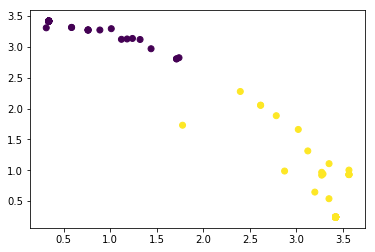

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x=senator_distances[:,0],y=senator_distances[:,1],c=labels)
plt.show()

# Step 7: Finding the Most Extreme
The most extreme senators are those who are furthest away from one cluster. For example, a radical Republic would be as far from the Democratic cluster as possible. Senators who are in between both clusters are more moderate, as they fall in between the views of the two parties. 

if we look at the first few rows of senator_distances, we can start to see who is more extreme:
<pre>
array([[ 3.12141628,  1.3134775 ], # slightly moderate, far from 1 close to 2
       [ 2.6146248 ,  2.05339992], # Modeerate, far from both
       [ 0.33960656,  3.41651746], # extremem Dem, very close to 1, far from 2
       [ 3.42004795,  0.24198446]]) # extreme Rep, far from 1, close to 2
</pre>

We'll create a formula to find extremists -- we'll cube the distances in both columns of senator_distances, then add them together. The higher the exponent we raise a set of numbers to, the more separation we'll see between small values and low values. For instance, squaring [1,2,3] results in [1,4,9], and cubing it results in [1,8,27].

We cube the distances so that we can get a good amount of separation between the extremists who are farther away from a party, who have distances that look like extremist = [3.4, .24], and moderates, whose distances look like moderate = [2.6, 2]. If we left the distances as is, we'd end up with 3.4 + .24 = 3.64, and 2.6 + 2 = 4.6, which would make the moderate, who is between both parties, seem extreme. If we cube, we instead end up with 3.4 ^ 3 + .24 ^ 3 = 39.3, and 2.6 ^ 3 + 2 ^ 3 = 25.5, which correctly identifies the extremist.

In [5]:
extremism = (senator_distances ** 3).sum(axis=1)
votes['extremism'] = extremism
votes=votes.sort_values('extremism',ascending = False)
votes[0:10]

,name,party,state,1,4,5,6,7,8,9,10,20,26,32,38,39,44,47,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540


# Step 8: Next Steps
Clustering is a powerful way to explore data and find patterns. Unsupervised learning is very commonly used with large datasets where it isnt obvious how to start with supervise machine learning. In general, its a good idea to try unsupervised learning to explore a datset before trying to use supervised learning machine learning models. 